<a href="https://colab.research.google.com/github/Dyuti2005/AIML_Task-2/blob/main/TASK2_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the Titanic dataset
# Ensure 'Titanic-Dataset (1).csv' is uploaded to Colab
df = pd.read_csv('Titanic-Dataset (1).csv')

# Step 1: Basic Exploration
print("Dataset Info:")
print(df.info())
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Statistical summary of numerical columns
print(df.describe())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
N

/tmp/ipython-input-2586896644.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')


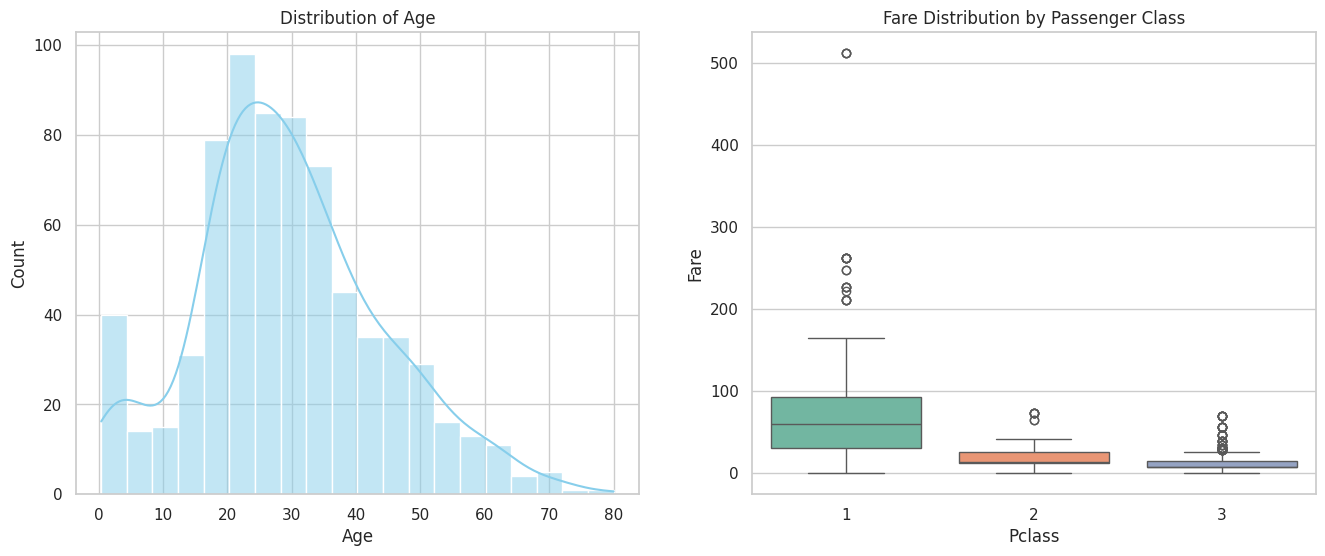

In [3]:
# Set theme
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))

# Histogram: Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Age')

# Boxplot: Fare by Pclass
# This helps identify outliers and see price differences between classes
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Fare Distribution by Passenger Class')

plt.show()

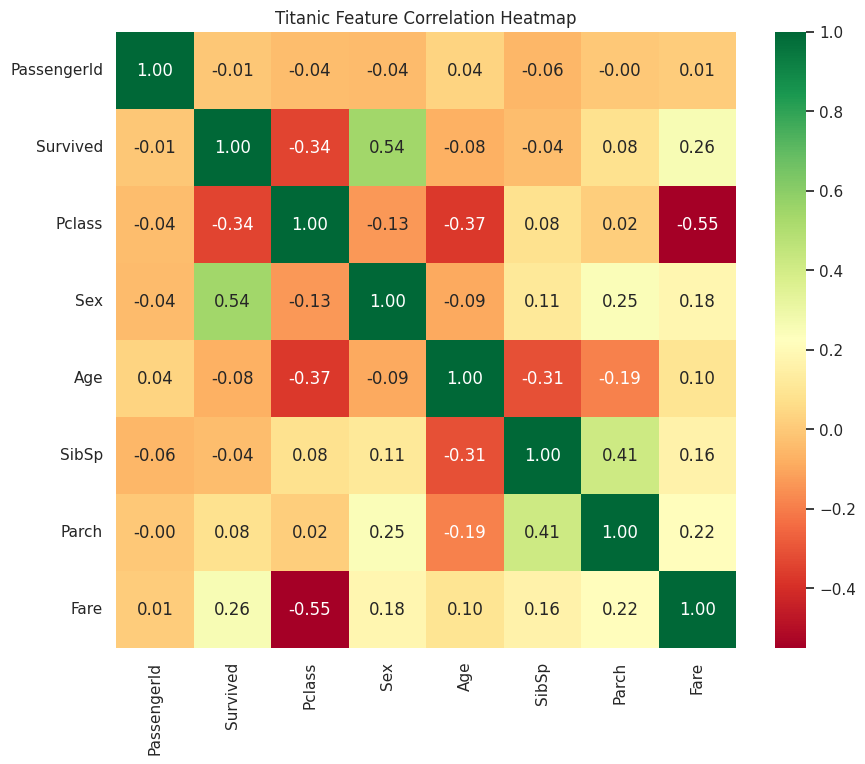

In [4]:
# Convert Sex to numeric for correlation mapping
df_numeric = df.copy()
df_numeric['Sex'] = df_numeric['Sex'].map({'male': 0, 'female': 1})

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.select_dtypes(include=[np.number]).corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Titanic Feature Correlation Heatmap')
plt.show()

/tmp/ipython-input-2522444123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
/tmp/ipython-input-2522444123.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='magma')
/tmp/ipython-input-2522444123.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')


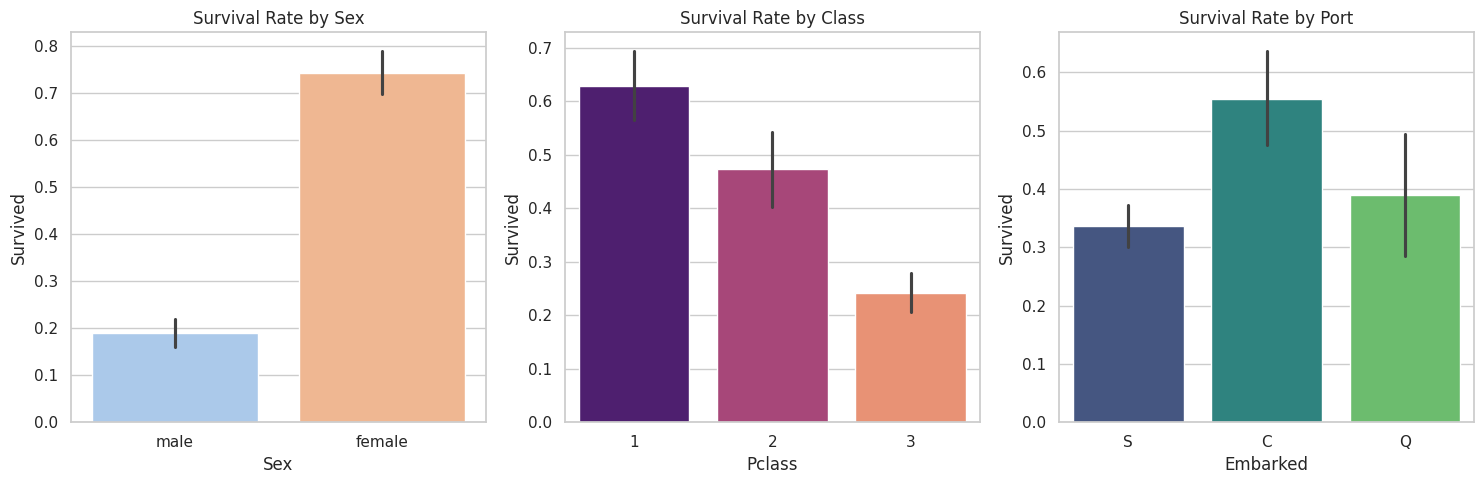

In [5]:
plt.figure(figsize=(15, 5))

# 1. Survival by Sex
plt.subplot(1, 3, 1)
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title('Survival Rate by Sex')

# 2. Survival by Class
plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df, palette='magma')
plt.title('Survival Rate by Class')

# 3. Survival by Embarkation Port
plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Port')

plt.tight_layout()
plt.show()

/tmp/ipython-input-301428845.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True, color='green')
/tmp/ipython-input-301428845.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Died', shade=True, color='red')


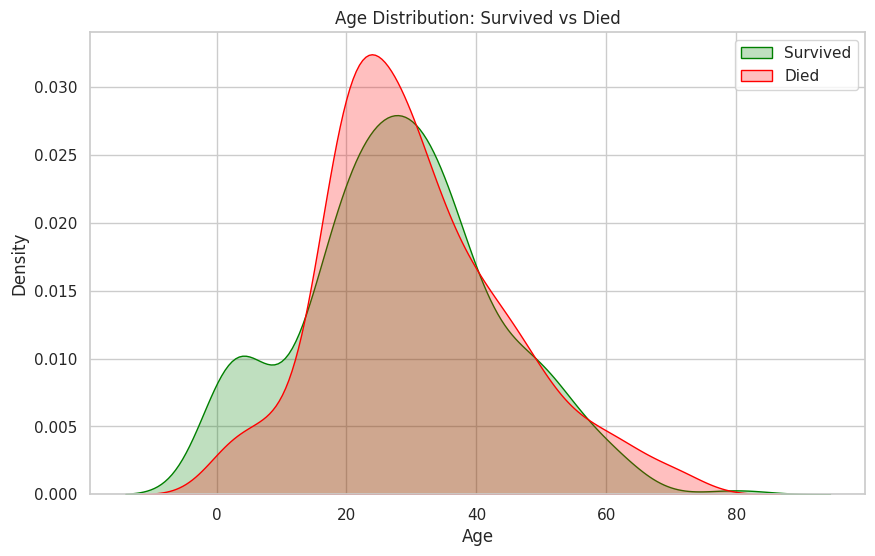

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True, color='green')
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Died', shade=True, color='red')
plt.title('Age Distribution: Survived vs Died')
plt.legend()
plt.show()